Reading data ...
finish reading data!
Modifing data ...
Modifing process:99%
 Recognize events ...
Recognizing process:100%
 Selecting ...
hIoni
selection progress:100%
 100% finished!


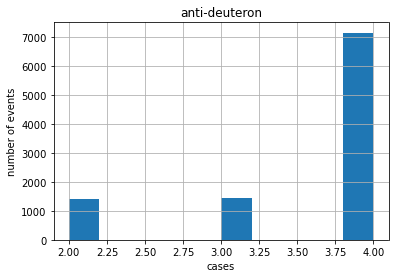

[3 4 4 ... 2 4 2]
finished!


In [34]:
"""
Statistics: count difference between anti-deuteron and anti-proton
@aurthor Jiancheng Zeng
@July 15 2021

"""

import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import array
import pandas as pd

case1 = []
case2 = []
case3 = []
case4 = []
vector = []
event = []
identical = []

"""
Select by name of the column
---------------------
"""
title = ["eventID", "trackID", "parentID", "particleID", "copyNb1 (mother volume)", "copyNb", "material", "time (ns)", "energy(MeV)", "energy deposit(MeV)", "parent process name", "process name", "px (MeV/c)", "py (MeV/c)", "pz (MeV/c)", "step length (cm)", "x (cm)", "y (cm)", "z (cm)"]

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/210810_anti_deuteron_80MeV.dat")    #get data file
print("finish reading data!")

"""
selection
"""
print("Modifing data ...")
for i in range(0, len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)


"""
recognize the data file length distribution
"""
print("\n Recognize events ...")
s = 0
temp = 1;
while s < len(event[:,0]):
    if(int(event[s,0]) == temp):
        identical.append(s)
        temp = temp + 1
    s = s + 1
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)

case = np.full(
  shape=len(identical)+1,
  fill_value=1,
  dtype=np.int
)

np.savetxt('/Users/jiancheng/GRAMS/Toy Model/Machine Learning/210810_anti_deuteron_80MeV_Modified.txt', selection, fmt='%s')

"""
counting
"""
print("\n Selecting ...")
print(selection[2][14][11])
for k in range(len(identical)+1):
    for j in range(selection[k].shape[0]):
        case[k] = 4
        if(str(selection[k][j][3]) == '-2112'):
            case[k] = 2
            break
        elif(str(selection[k][j][3]) == '-2212'):
            case[k] = 3
            break
    if(case[k] == 1):
        case1.extend(array(selection[k]))
    if(case[k] == 2):
        case2.extend(array(selection[k]))
    if(case[k] == 3):
        case3.extend(array(selection[k]))
    if(case[k] == 4):
        case4.extend(array(selection[k]))
    print("selection progress:"+str(int(100*k/len(identical)))+"%", end='\r')

"""
save different kind of evnets to different files
"""
np.savetxt("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/210810_anti_deuteron_80MeV/case1.txt", case1, delimiter = ",  ", fmt = "%s")
np.savetxt("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/210810_anti_deuteron_80MeV/case2.txt", case2, delimiter = ",  ", fmt = "%s")
np.savetxt("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/210810_anti_deuteron_80MeV/case3.txt", case3, delimiter = ",  ", fmt = "%s")
np.savetxt("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/210810_anti_deuteron_80MeV/case4.txt", case4, delimiter = ",  ", fmt = "%s")

print("\n 100% finished!")


plt.hist(case)
plt.xlabel('cases')
plt.ylabel('number of events')
plt.title('anti-deuteron')
plt.grid()
plt.show()
print(case)
#print("\n", case1, "\n", case2, "\n", case3, "\n", case4, "\n")
print("finished!")



In [42]:
print("case2:"+str(sum(case == 2)/100)+"%")
print("case3:"+str(sum(case == 3)/100)+"%")
print("case4:"+str(sum(case == 4)/100)+"%")

case2:14.13%
case3:14.51%
case4:71.36%
